# Library import

In [1]:
# for manupilating data

import numpy as np
import pandas as pd 

# for visualizations


import seaborn as sns
import matplotlib.pyplot as plt


# for ml tools
from sklearn.model_selection import (StratifiedKFold,
                                     cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV)

from warnings import filterwarnings
filterwarnings('ignore')

# Data Analysis

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
## Customer ID kolonu gereksiz bunu kaldıralım
##Senior Citizen category tipinde olmalı
#object leri category e çevirmek lazım
#total charges object => int yani numeric olmalıydı nedenine bakalım string şeklinde null değer var anlamına gelebilir.
## null value yok datada 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
"""customerID: Simply, the id for each customer.
gender: Whether the customer is a male or a female.
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).
Partner: Whether the customer has a partner or not (Yes, No).
Dependnts : Whether the customer has dependents or not (Yes, No).
tenure : Number of months the customer has stayed with the company.
PhoneService : Whether the customer has a phone service or not (Yes, No).
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service).
InternetService : Customer’s internet service provider (DSL, Fiber optic, No).
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service).
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service).
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service).
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service).
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service).
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service).
Contract : The contract term of the customer (Month-to-month, One year, Two year).
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No).
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
MonthlyCharges : The amount charged to the customer monthly.
TotalCharges : The total amount charged to the customer.
churn : Whether the customer churned or not (Yes or No)."""

'customerID: Simply, the id for each customer.\ngender: Whether the customer is a male or a female.\nSeniorCitizen: Whether the customer is a senior citizen or not (1, 0).\nPartner: Whether the customer has a partner or not (Yes, No).\nDependnts : Whether the customer has dependents or not (Yes, No).\ntenure : Number of months the customer has stayed with the company.\nPhoneService : Whether the customer has a phone service or not (Yes, No).\nMultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service).\nInternetService : Customer’s internet service provider (DSL, Fiber optic, No).\nOnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service).\nOnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service).\nDeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service).\nTechSupport : Whether the customer has tech support or not (Yes, No, No internet servi

In [8]:
#float olmayan satırları bulma kodu, neden object olduğunu anlamak için
for i in range(len(df["TotalCharges"])):
    val = df["TotalCharges"][i]
    try:
        float(val)
    except:
        print(f"Row {i} has a value of TotalCharges = {val}")

Row 488 has a value of TotalCharges =  
Row 753 has a value of TotalCharges =  
Row 936 has a value of TotalCharges =  
Row 1082 has a value of TotalCharges =  
Row 1340 has a value of TotalCharges =  
Row 3331 has a value of TotalCharges =  
Row 3826 has a value of TotalCharges =  
Row 4380 has a value of TotalCharges =  
Row 5218 has a value of TotalCharges =  
Row 6670 has a value of TotalCharges =  
Row 6754 has a value of TotalCharges =  


In [9]:
##null değer olduğunu gördük

df.iloc[3826,:]

customerID                   3213-VVOLG
gender                             Male
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                       Yes
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    25.35
TotalCharges                           
Churn                                No
Name: 3826, dtype: object

In [10]:
df["TotalCharges"].isnull().sum()

0

In [11]:
# applying pd.to_numeric() while making errors = "coerce" will automatically convert strings to nulll values.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [12]:
df["TotalCharges"].isnull().sum()

11

In [13]:
"""
Row 488 has a value of TotalCharges =  
Row 753 has a value of TotalCharges =  
Row 936 has a value of TotalCharges =  
Row 1082 has a value of TotalCharges =  
Row 1340 has a value of TotalCharges =  
Row 3331 has a value of TotalCharges =  
Row 3826 has a value of TotalCharges =  
Row 4380 has a value of TotalCharges =  
Row 5218 has a value of TotalCharges =  
Row 6670 has a value of TotalCharges =  
Row 6754 has a value of TotalCharges """

'\nRow 488 has a value of TotalCharges =  \nRow 753 has a value of TotalCharges =  \nRow 936 has a value of TotalCharges =  \nRow 1082 has a value of TotalCharges =  \nRow 1340 has a value of TotalCharges =  \nRow 3331 has a value of TotalCharges =  \nRow 3826 has a value of TotalCharges =  \nRow 4380 has a value of TotalCharges =  \nRow 5218 has a value of TotalCharges =  \nRow 6670 has a value of TotalCharges =  \nRow 6754 has a value of TotalCharges '

In [14]:
Null_Loc = ["488", "753", "936", "1082", "1340", "3331", "3826", "4380", "5218", "6670", "6754"]

In [15]:
Null_Loc

['488',
 '753',
 '936',
 '1082',
 '1340',
 '3331',
 '3826',
 '4380',
 '5218',
 '6670',
 '6754']

In [16]:
res = [eval(i) for i in Null_Loc]
print("Modified list is: ", res)

Modified list is:  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [17]:
res

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [18]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [19]:
df["TotalCharges"].isnull().sum()

0

In [20]:
##fillna yi de yap.

In [21]:
#normal dağılım olmadığı için medyan almak daha mantıklıydı.
#null kalıp kalmayacağına algoritmaya göre karar vermelisin. ağaç algoritmalarında null kalabilir
#logistic regresyonda null kalmamalı
#monthly charges la eşitleyebilirdim.

In [22]:
#null

In [23]:
"""df.dropna(axis = 0, inplace = True)
assert df["TotalCharges"].isnull().sum() == 0 """

'df.dropna(axis = 0, inplace = True)\nassert df["TotalCharges"].isnull().sum() == 0 '

In [24]:
df["TotalCharges"].isnull().sum()

0

In [25]:
#neden null olduğunu incele 

In [26]:
df.duplicated().sum()

0

In [27]:
"""df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")"""

'df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")'

In [28]:
# convert columns to categories
cols_to_cat = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
               "PaperlessBilling", "PaymentMethod", "Churn", "SeniorCitizen"]

In [29]:
for col in cols_to_cat:
    df[col] = df[col].astype("category")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [31]:
df.describe(include = "category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [32]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


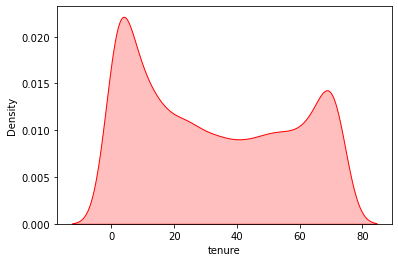

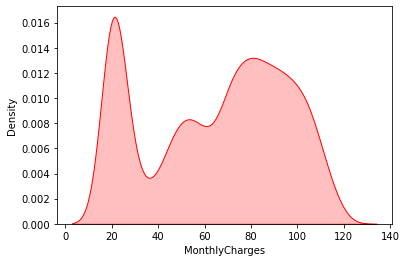

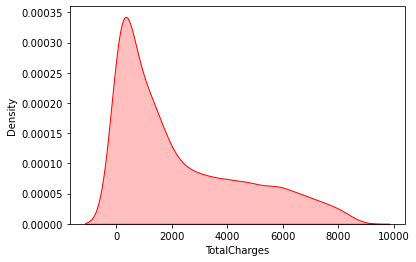

In [33]:
numeric_variable_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for i in numeric_variable_list:
    sns.kdeplot(df[i],shade=True, color="r")
    plt.show()

In [34]:
##Tenure 
#Bimodal dağılmış  müşteriler ya uzun süreli ya da kısa süreli olmuş 

##Monthly charges 
#Bimodal dağılmış

#Total Charges
#right shewed olarak dağılmış

In [35]:
#Data Leakage olmaması için şimdiden test setimi ayırıyorum.
#Data exploration a sonra geçicem


In [36]:
#customer_id yi droplamak için
df = df.iloc[:,1:21]

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [39]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [40]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
#droplamanın diğer yolu
""""df.drop(columns=['customerID'],inplace=True)"""

'"df.drop(columns=[\'customerID\'],inplace=True)'

IndexError: index 4 is out of bounds for axis 0 with size 4

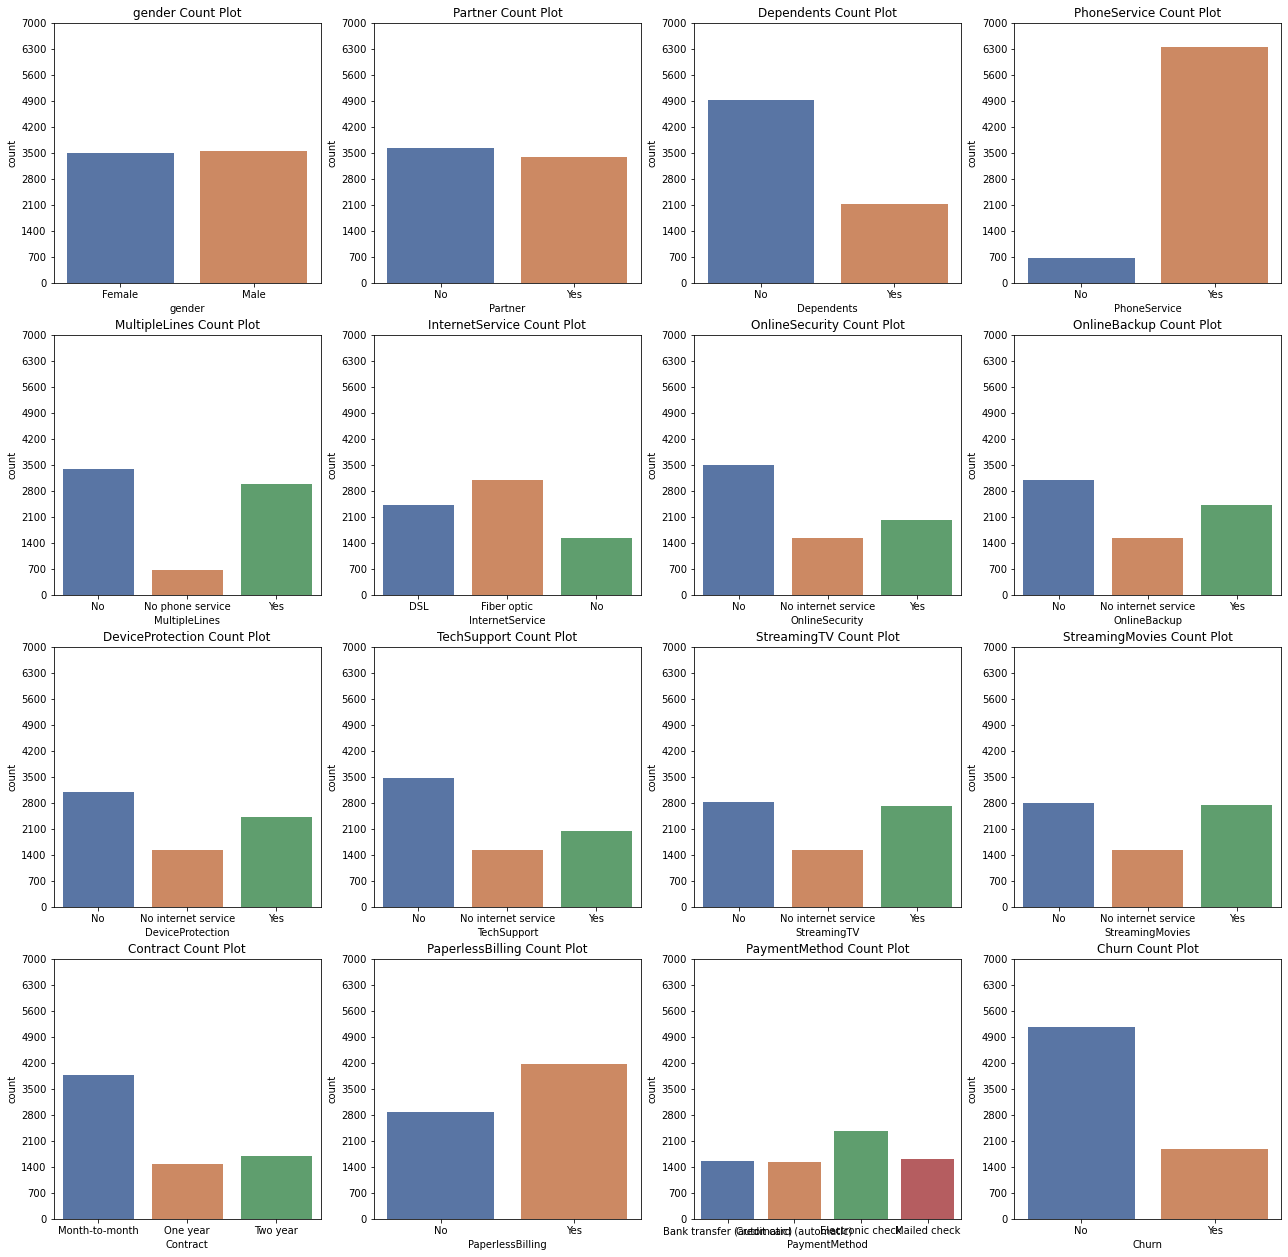

In [42]:
fig , ax = plt.subplots(4,4,figsize=(22,22))
for i , col in enumerate(cols_to_cat):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i//4,i%4]
                      ,palette='deep'
                      )
        ax[i//4,i%4].set_title(f'{col} Count Plot')
        ax[i//4,i%4].set_yticks(range(0, df.shape[0], 700))

plt.show()

In [44]:
#bu grafik continuos değişkenler için daha anlamlı

In [45]:
#sns.kdeplot(data = df, x = "Churn", hue = "gender")

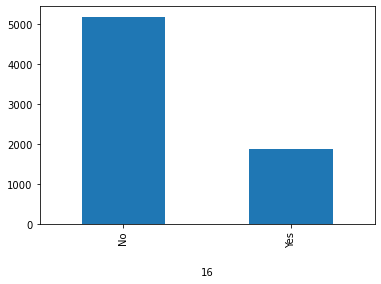

In [46]:
df["Churn"].value_counts().plot(kind='bar')
plt.xlabel(i, labelpad=20)
plt.show()

#15 yerine churn yazsın

In [47]:
#This function takes dataframe , 1:4 columns ,hue and palette then visualize seaborn countplots
def count_group(df,cols,set_hue=None,set_palette=None):
    colors=['red','green','blue','yellow']
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i]
                      ,color=colors[i]
                      ,hue=set_hue
                      ,palette=set_palette)
        ax[i].set_title(f'{col} Count Plot')

    plt.show()

In [48]:
#kategorik değişkenler için churn dağılımına bakalım
#Kod 4'lü çalıştığı için 4'er 4'er bakıyoruz

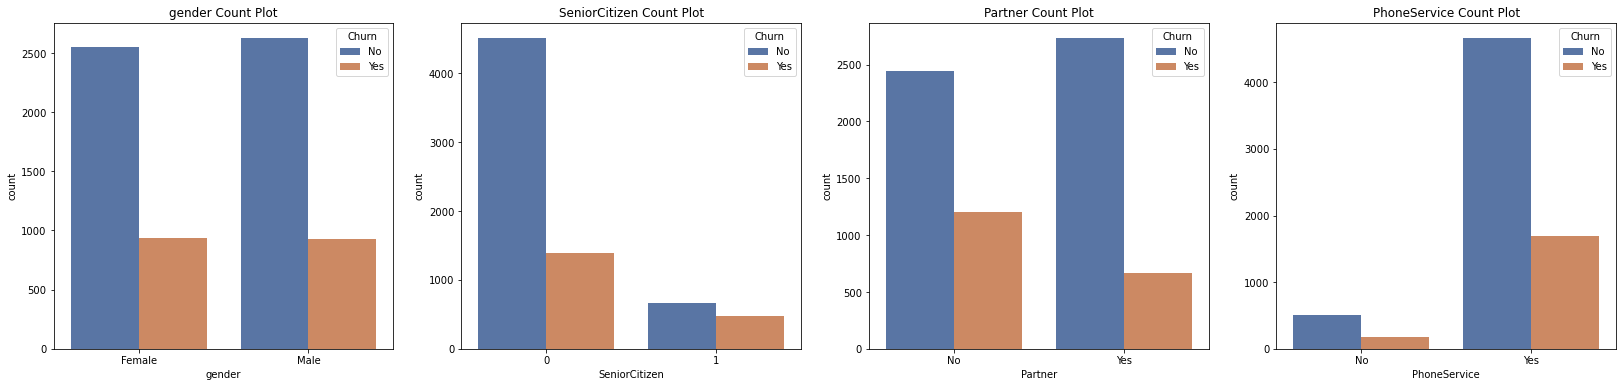

In [49]:
count_group(df,['gender','SeniorCitizen','Partner','PhoneService'],set_hue='Churn',set_palette='deep')

In [50]:
#female or male doesn't reflect churn distribution//lots of f and m is not churn
#senior citizen ların büyük bir kısmı yarısından azı churn ediyor 
#partner ı olmayanların churn oranı olanlara göre daha fazla
#phone service olanların yarısından fazlası churn etmiyormuş

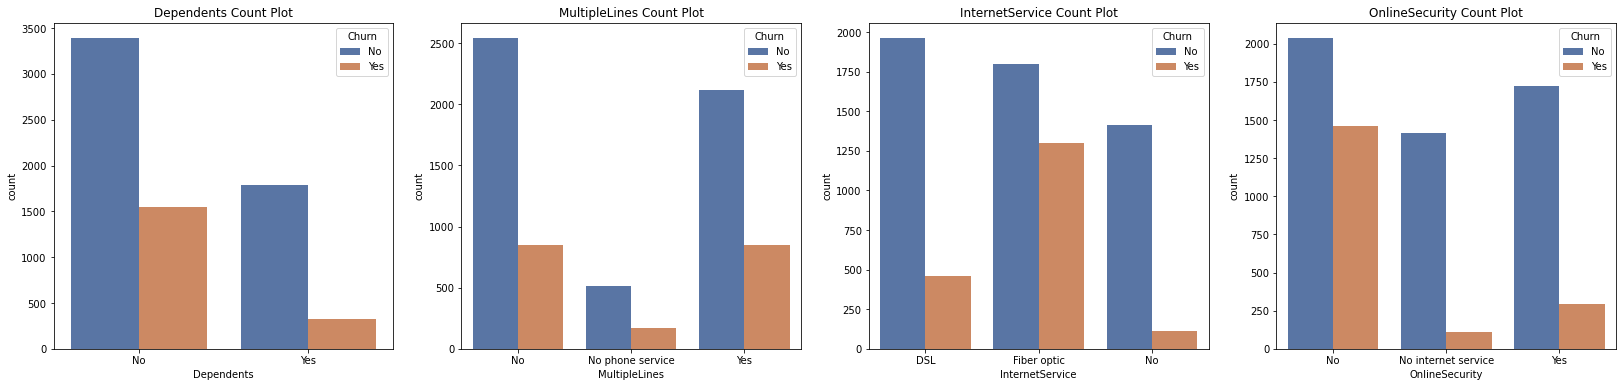

In [51]:
count_group(df,['Dependents','MultipleLines','InternetService','OnlineSecurity'],set_hue='Churn',set_palette='deep')

In [52]:
#dependent olanların churn olma miktarı daha az
#multiple lines yes olanların churn oranı daha yüksek
#ınternetservice fiber optic de churn oranı daha yüksek

#onlinesecurity de no olanların churn oranı daha yüksek  ---grafikler benziyo
#oninebackup da no olanların churn oranı daha yüksek
#deviceprotection da no olanların churn oranı daha yüksek
#techsupport da no olanların churn oranı daha yüksek

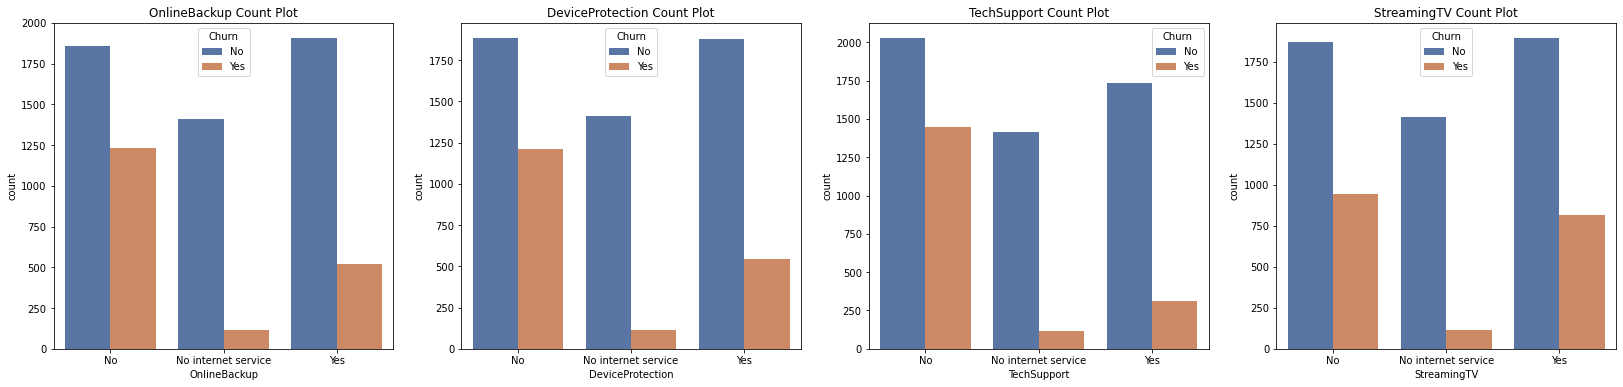

In [53]:
count_group(df,['OnlineBackup','DeviceProtection','TechSupport','StreamingTV'],set_hue='Churn',set_palette='deep')

In [54]:
#streamingtv ve streaming movies dağılımı benzer
#contract month-to-month churn oranı fazla
#paperlessbilling yes churn oranı fazla
#paymentmethod electroniccheck churn oranı yüksek 

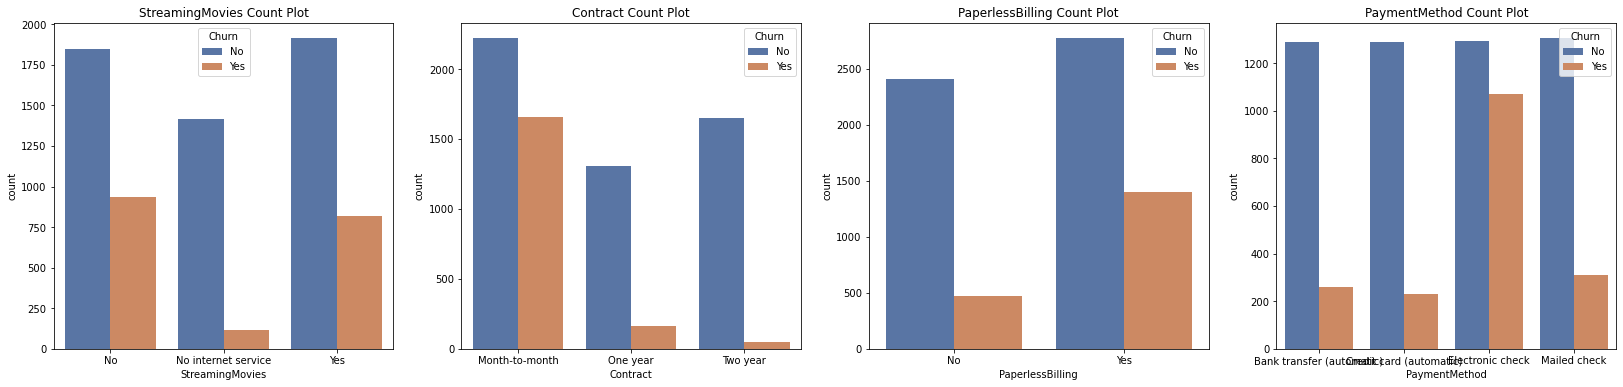

In [55]:
count_group(df,['StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],set_hue='Churn',set_palette='deep')

In [56]:
#numeric değişkenler için de churn bakalım

In [63]:
def plot_hist(df, col, hue = None, ax = None):
    """
     This function Outputs the histogram for the column"
     
     Arguments \
     df: dataframe.
     col: the column to plot the histogram for.
     hue: (optional) to specify if there is a second variable.
     ax: (optional) to specify the axis to draw in.
    """
    plot = sns.histplot(data = df, x = col, kde= True, hue = hue, palette = "pastel", ax = ax)
        
    # titles
    plot.set_title(f"histogram plot for column {col}", fontsize = 25,weight = "bold", 
                fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 15,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 15,  weight = "semibold", fontname = "monospace")

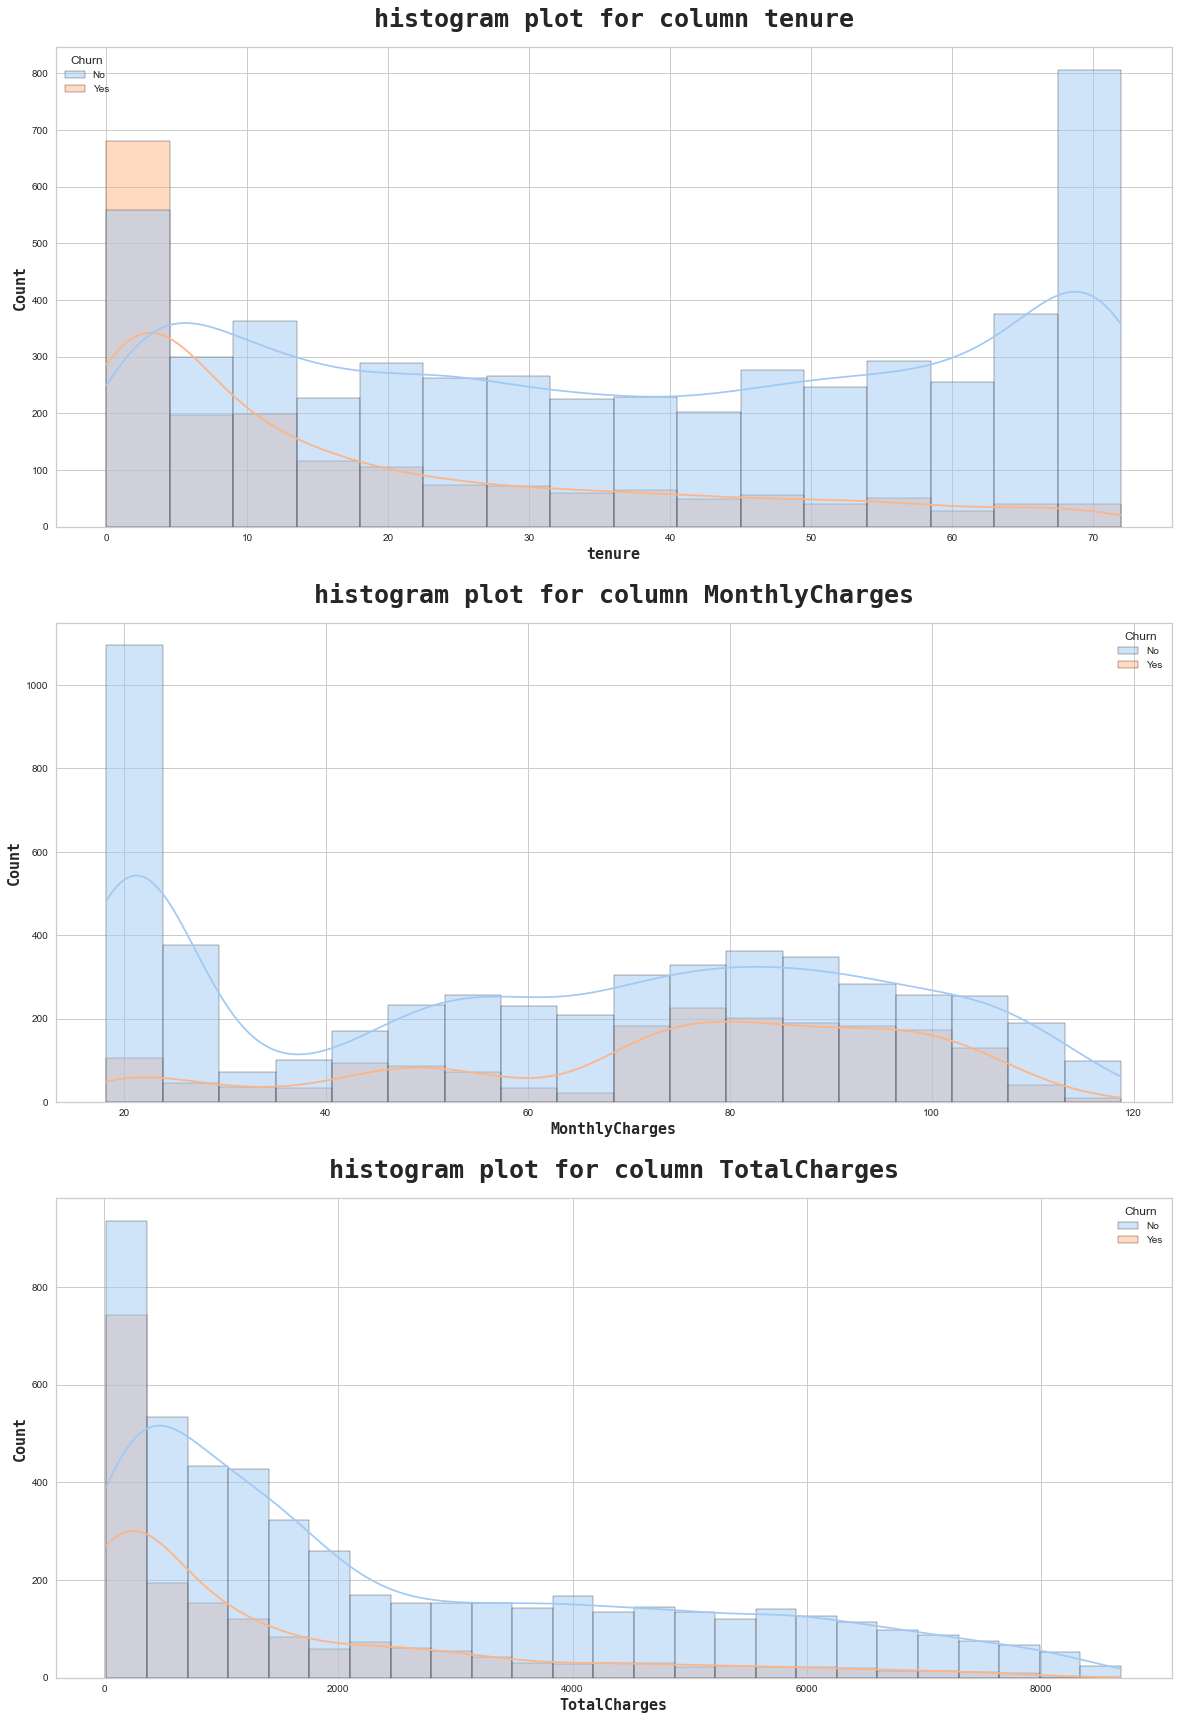

In [64]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, ax = plt.subplots(3, 1, figsize = (20, 30))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i], hue = "Churn")
plt.show()

In [65]:
#People who have spent a long time with the company don't tend to churn
#As the monthly charges increases, count of People who churn gets bigger and this is reasonable. Also, most of people who don't churn pay a small amout of Monthly charges.
#Our data is imbalanced and people who don't churn are more than people who do, I think this is the reason why in the third plot the two distributions are identical except that the one with people who churn is shifted UP.

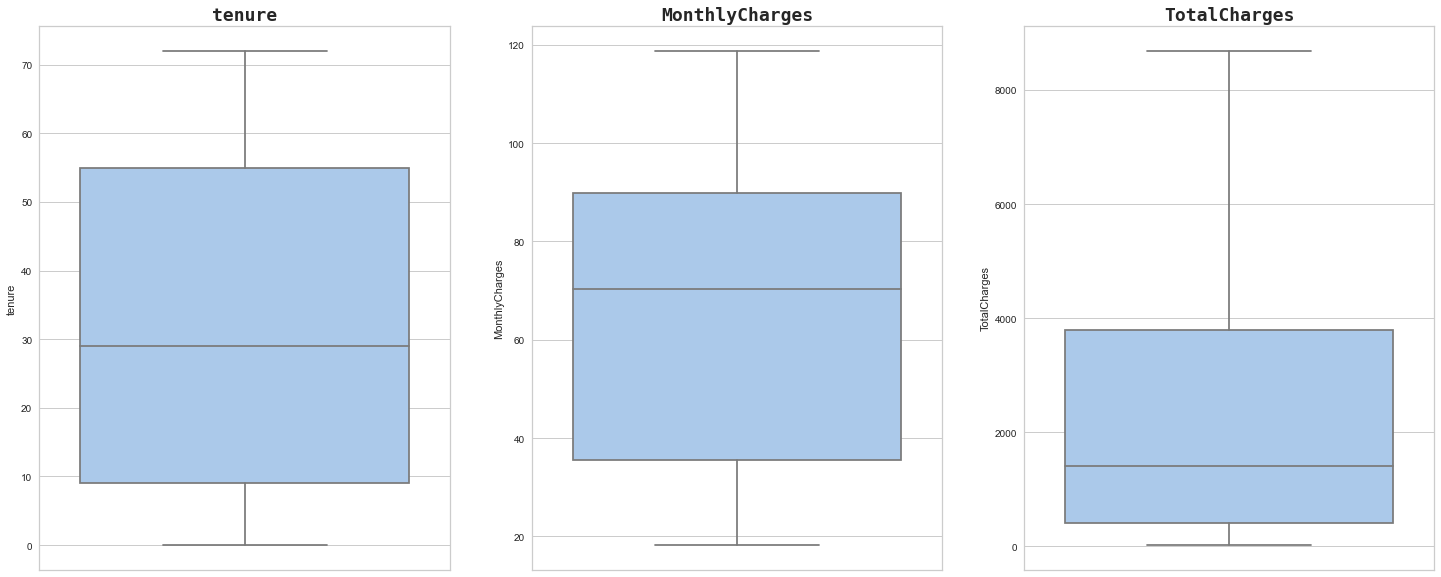

In [66]:
# I will draw boxplots to investigate outliers

fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = df, y = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

# Model Preparation

In [67]:
#Replace Yes with 1 and No with 0 in my target column.
df["Churn"].replace({"Yes": 1, "No": 0}, inplace = True)

In [68]:
X = df.drop(columns = "Churn")

In [69]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [71]:
#PREPARING CATEGORICAL VARIABLES
df_cat = X.select_dtypes(include = ['category'])
#Churn değişken olarak girmeyecektir

df_cat_cols=df_cat.columns

df_cont = X.select_dtypes(include = ['int64','int32','float64'])

In [72]:
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [73]:
#DUMMY CATEGORICAL VARIABLES
for i in df_cat: 
    df_cat = pd.concat([df_cat,pd.get_dummies(df_cat[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)
df_cat = df_cat.drop(columns=df_cat_cols)
features = pd.concat([df_cont,df_cat],axis=1)
X=features

y= df['Churn']

In [74]:
# Scaling continuous variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [75]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.010310,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.015330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [76]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [77]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# MODELING

In [78]:
#source= https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction
import plotly.tools as tls #visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,SCORERS
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [80]:
y_pred = loj_model.predict(X_test)

In [81]:
print(loj_model.score(X_train,y_train))
print(loj_model.score(X_test,y_test))

0.8026369168356998
0.812588736393753


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)

array([[1391,  148],
       [ 248,  326]], dtype=int64)

### Logistic Regression with Oversample

In [83]:
#SMOTE( Synthetic Minority Oversampling )
from imblearn.over_sampling import SMOTE

smote_X = X
smote_Y = y

target_col = ["Churn"]
cols    = X.columns

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_resample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [84]:
logit_smote = LogisticRegression(solver = "liblinear")

In [85]:
logit_smote = logit_smote.fit(os_smote_X,os_smote_Y)

In [86]:
y_pred = logit_smote.predict(X_test)

In [87]:
print(logit_smote.score(X_train,y_train))
print(logit_smote.score(X_test,y_test))

0.7470588235294118
0.7628963558920966


In [88]:
confusion_matrix(y_test, y_pred)

array([[1142,  397],
       [ 104,  470]], dtype=int64)

## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf_model = RandomForestClassifier().fit(os_smote_X,os_smote_Y )

In [132]:
rf_model

RandomForestClassifier()

In [133]:
y_pred_train = rf_model.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.9980504289056408

In [134]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9436819687647894

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1469,   70],
       [  49,  525]], dtype=int64)

### Random Forest Model Tuning

In [136]:
?rf_model

In [137]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [138]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 2, 
                           n_jobs = -1, 
                           verbose = 2) 

In [139]:
rf_cv_model.fit(os_smote_X, os_smote_Y)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [140]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [141]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(os_smote_X, os_smote_Y)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=1000)

In [142]:
y_pred_train = rf_tuned.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.8847153626202235

In [143]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8277330809275911

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1267,  272],
       [  92,  482]], dtype=int64)

In [145]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

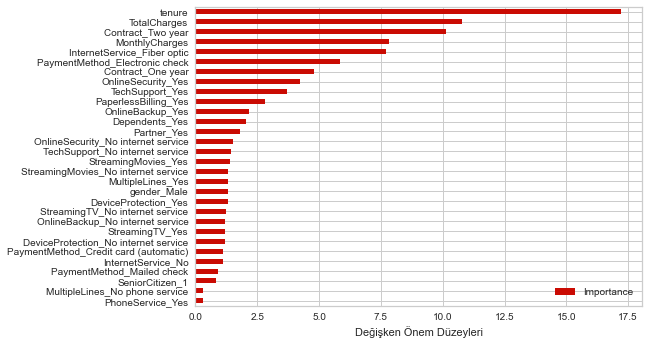

In [146]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Xgboost

In [147]:
#!pip install xgboost
from xgboost import XGBClassifier

In [148]:
xgb_model = XGBClassifier().fit(os_smote_X, os_smote_Y)

In [149]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [150]:
y_pred_train = xgb_model.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.9460618663893944

In [151]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8892569805963085

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1410,  129],
       [ 105,  469]], dtype=int64)

### Xgboost Model Tuning

In [153]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [154]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 2, n_jobs = -1, verbose = 2)

In [155]:
xgb_cv_model.fit(os_smote_X, os_smote_Y)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits
[12:26:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [156]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [157]:
xgb = XGBClassifier(learning_rate = 0.06, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [158]:
xgb_tuned =  xgb.fit(os_smote_X,os_smote_Y)

[12:26:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [159]:
y_pred_train = xgb_tuned.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.8760072783987523

In [160]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.820160908660672

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1297,  242],
       [ 138,  436]], dtype=int64)

## LightGBM

In [ ]:
#!pip install lightgbm

In [162]:
from lightgbm import LGBMClassifier

In [163]:
lgbm_model = LGBMClassifier().fit(os_smote_X, os_smote_Y)

In [164]:
y_pred_train = lgbm_model.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.9020015596568755

In [165]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8518693800283956

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1356,  183],
       [ 130,  444]], dtype=int64)

### LightGBM Model Tuning

In [167]:
?lgbm_model

In [168]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [169]:


lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 2, 
                             n_jobs = -1, 
                             verbose = 2)


In [170]:
lgbm_cv_model.fit(os_smote_X, os_smote_Y)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [171]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [172]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)

In [173]:
lgbm_tuned = lgbm.fit(os_smote_X,os_smote_Y)

In [174]:
y_pred_train = lgbm_tuned.predict(os_smote_X)
accuracy_score(os_smote_Y, y_pred_train)

0.8693787366779309

In [175]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8121154756270705

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1274,  265],
       [ 132,  442]], dtype=int64)

## Tüm modellerin karşılaştırması

In [177]:
# lgbm_tuned,
modeller = [
    loj_model,
    rf_tuned,
    xgb_tuned,
    lgbm_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 81.2589%
----------------------------
RandomForestClassifier:
Accuracy: 82.7733%
----------------------------
XGBClassifier:
Accuracy: 82.0161%
----------------------------
LGBMClassifier:
Accuracy: 81.2115%


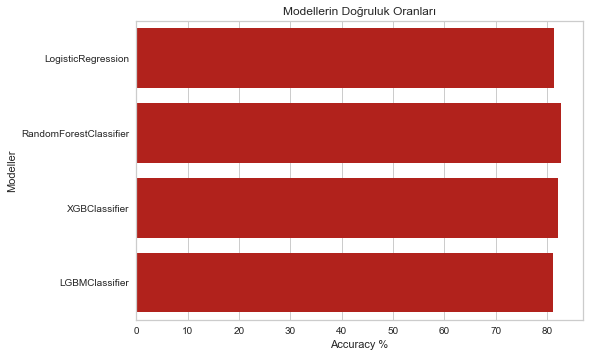

In [178]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    